## Learning classification with self-made dataset

In [72]:
from google.colab import drive
drive.mount("/content/drive",force_remount= True)

Mounted at /content/drive


In [2]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 2.7 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=2e78e0f0d3527ab9542517b6662a9e5e88a3b7e83109e9745e542e36f2419f07
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [3]:
!rm -rf ~/.kaggle

In [4]:

! mkdir ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c dogs-vs-cats


 99% 802M/812M [00:25<00:00, 36.8MB/s]
100% 812M/812M [00:25<00:00, 32.8MB/s]


In [9]:
import os
os.getcwd()

'/content'

In [10]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [11]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [12]:
!unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [8]:
import numpy as np

In [9]:
lst ={}
lst["cat"] = []
lst["dog"] = []

In [10]:
import glob

for name in glob.glob("/content/train/*.jpg"):
  if np.random.binomial(1, 0.5) > 0:
    if "cat" in name:
      if len(lst["cat"]) == 5:
        pass
      else:
        lst["cat"].append(name)
    elif "dog" in name:
      if len(lst["dog"]) == 5:
        pass
      else:
        lst["dog"].append(name)
    elif len(lst["cat"]) == 5 and len(lst["dog"]) == 5:
      break

In [11]:
import re
from PIL import Image

In [25]:
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in lst["dog"]:
    
    
    # if re.search('dog', img):
    
    dog_img_ = Image.open(img)
    
    
    dog_img_ = dog_img_.resize((224, 224))
    
    
    dog_img = np.array(dog_img_)
    
    
    dog_img = dog_img / 255.
    
  
    dog_img = dog_img.reshape((1,224,224,3))
    
    dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    dog_img_.close()
 
for img in lst["cat"]:

    cat_img_ = Image.open(img)
    
    cat_img_ = cat_img_.resize((224, 224))
    
    cat_img = np.array(cat_img_)
    
    cat_img = cat_img / 255.
    
    cat_img = cat_img.reshape((1,224,224,3))
    
    cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
    
    cat_img_.close()

In [27]:
dog_img_array.shape

(5, 224, 224, 3)

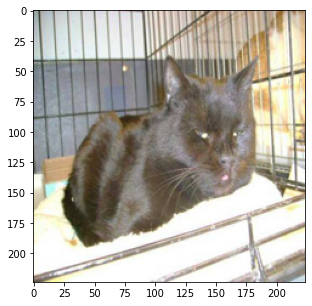

In [28]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(cat_img_array[3])

plt.show()

In [29]:
def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

<class 'PIL.Image.Image'>


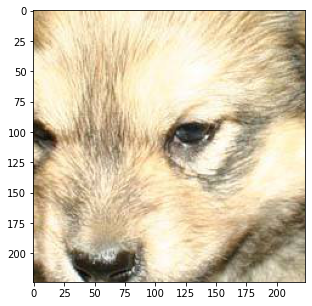

In [34]:
img = Image.open(lst["dog"][1])

img_new = crop_center(img, 224, 224)

print(type(img_new))

plt.imshow(img_new)

plt.show()

img.close()

In [35]:
from keras.preprocessing.image import load_img, img_to_array

In [38]:
img_keras = load_img(lst["cat"][4], grayscale=False, color_mode='rgb', target_size=(224,224))

img_keras_array = img_to_array(img_keras) / 255.



img_keras_array

array([[[0.44313726, 0.26666668, 0.19215687],
        [0.44313726, 0.27450982, 0.2       ],
        [0.44313726, 0.28235295, 0.21176471],
        ...,
        [0.40784314, 0.19607843, 0.02352941],
        [0.40392157, 0.18039216, 0.00392157],
        [0.39607844, 0.16862746, 0.        ]],

       [[0.4392157 , 0.27058825, 0.19607843],
        [0.44705883, 0.2784314 , 0.20392157],
        [0.4509804 , 0.2901961 , 0.21960784],
        ...,
        [0.39607844, 0.18431373, 0.01176471],
        [0.40784314, 0.18431373, 0.00784314],
        [0.4117647 , 0.18431373, 0.00392157]],

       [[0.42745098, 0.26666668, 0.1882353 ],
        [0.4392157 , 0.2784314 , 0.2       ],
        [0.44313726, 0.29411766, 0.21960784],
        ...,
        [0.39215687, 0.18039216, 0.00784314],
        [0.40784314, 0.18431373, 0.00784314],
        [0.41960785, 0.19215687, 0.01176471]],

       ...,

       [[0.09803922, 0.05490196, 0.03921569],
        [0.09803922, 0.05490196, 0.03921569],
        [0.09803922, 0

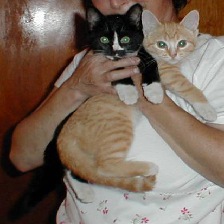

In [39]:
img_keras

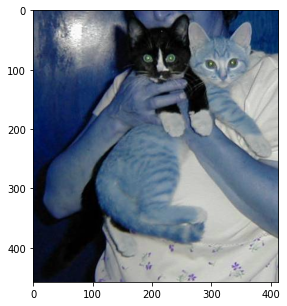

In [41]:
import cv2
img = cv2.imread(lst["cat"][4])

plt.imshow(img)

plt.show()

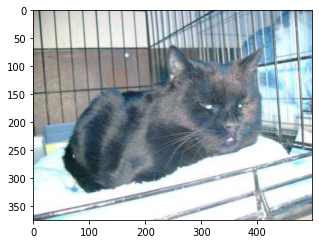

In [45]:
img = cv2.imread(lst["cat"][3])
plt.imshow(img)

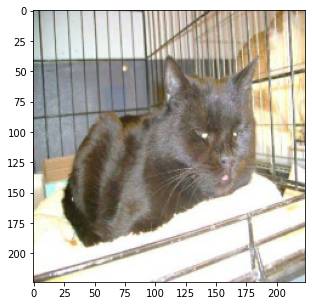

In [46]:
img = cv2.imread(lst["cat"][3])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)

plt.show()

In [29]:
img_array = np.empty((0,224,224,3))



for img in lst["cat"]:

    cat_img_ = Image.open(img)
    
    cat_img_ = cat_img_.resize((224, 224))
    
    cat_img = np.array(cat_img_)
    
    cat_img = cat_img / 255.
    
    cat_img = cat_img.reshape((1,224,224,3))
    
    img_array = np.concatenate([img_array, cat_img], axis = 0)
    
    cat_img_.close()
    

for img in lst["dog"]:
    
    
    # if re.search('dog', img):
    
    dog_img_ = Image.open(img)
    
    
    dog_img_ = dog_img_.resize((224, 224))
    
    
    dog_img = np.array(dog_img_)
    
    
    dog_img = dog_img / 255.
    
  
    dog_img = dog_img.reshape((1,224,224,3))
    
    img_array = np.concatenate([img_array, dog_img], axis = 0)
    
    dog_img_.close()
 


In [74]:
img_array.shape

(10, 224, 224, 3)

In [30]:
X = img_array
Y = []
for i in range(len(lst["cat"])):
  Y.append(0)
for i in range(len(lst["dog"])):
  Y.append(1)



In [31]:
import random
c = list(zip(X, Y))
random.shuffle(c)

X, Y = zip(*c)

In [ ]:
X

In [33]:
img_array = np.empty((0,224,224,3))
for data in list(X):
    img_array = np.concatenate([img_array, data[np.newaxis,:]], axis = 0)

In [34]:
X = img_array
Y = list(Y)

In [99]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
# model = Sequential()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [100]:
model.fit(X, Y, epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6855 - accuracy: 0.6000
Epoch 2/20
1/1 [==============================] - 1s 783ms/step - loss: 0.4836 - accuracy: 0.8000
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 4.9190 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 1s 561ms/step - loss: 1.3024 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 1s 565ms/step - loss: 0.6107 - accuracy: 0.6000
Epoch 6/20
1/1 [==============================] - 1s 540ms/step - loss: 0.3729 - accuracy: 0.7000
Epoch 7/20
1/1 [==============================] - 1s 570ms/step - loss: 0.2282 - accuracy: 0.9000
Epoch 8/20
1/1 [==============================] - 1s 554ms/step - loss: 0.1465 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 1s 556ms/step - loss: 0.1183 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 1s 558ms/step - loss: 0.0837 - accuracy: 1.0000
Epoch 11/20
1/1 [========

## Data expansion for classification dataset


In [101]:
!pip install -U albumentations

     |████████████████████████████████| 102 kB 5.8 MB/s 
     |████████████████████████████████| 47.7 MB 110 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
!pip uninstall opencv-python-headless==4.5.5.62

In [4]:
!pip install opencv-python-headless==4.5.2.52

     |████████████████████████████████| 38.2 MB 2.5 MB/s 


In [6]:

import albumentations as A
import cv2

In [7]:
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

In [19]:
image = cv2.imread(lst["cat"][3])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]

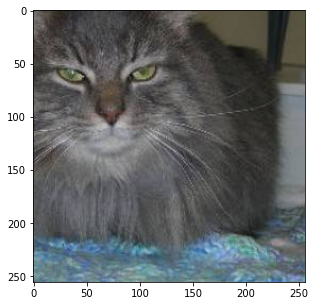

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(transformed_image)

plt.show()

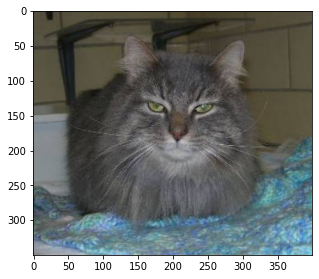

In [20]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(image)

plt.show()

['/content/train/cat.12450.jpg',
 '/content/train/cat.8994.jpg',
 '/content/train/cat.9826.jpg',
 '/content/train/cat.4065.jpg',
 '/content/train/cat.464.jpg']

In [56]:

import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import cv2
from albumentations import *



 
output_dir = "results"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)
 
for i,file in enumerate(lst["cat"]+lst["dog"]):
 
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    transforms = Compose([
            Rotate(limit=40),
            RandomBrightness(limit=0.1),
            JpegCompression(quality_lower=85, quality_upper=100, p=0.5),
            HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.5),
            RandomContrast(limit=0.2, p=0.5),
            HorizontalFlip(),
        ])

    if "cat" in file:
      name = "cat"
    elif "dog" in file:
       name = "dog"
    for j in range(50):
      transformed = transforms(image=image)
       
      cv2.imwrite("/content/"+output_dir+"/"+name+str(i)+str(j)+".jpg", transformed["image"])
      

    

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:1802: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:967: FutureWarning: This class has been deprecated. Please use ImageCompression
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:1828: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  FutureWarning,


In [64]:
img_array = np.empty((0,224,224,3))


path = glob.glob("/content/results/*.jpg")
for img in path:

    img= Image.open(img)
    
    img = img.resize((224, 224))
    
    img = np.array(img)
    
    img = img / 255.
    
    img = img.reshape((1,224,224,3))
    
    img_array = np.concatenate([img_array, img], axis = 0)
    

    



In [66]:
X = img_array
Y = []
for img in path:

  if "cat" in img:
    Y.append(0)
  else:
    Y.append(1)


In [67]:
import random
c = list(zip(X, Y))
random.shuffle(c)

X, Y = zip(*c)

In [68]:
img_array = np.empty((0,224,224,3))
for data in list(X):
    img_array = np.concatenate([img_array, data[np.newaxis,:]], axis = 0)
X = img_array
Y = list(Y)

In [71]:

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, np.array(Y), epochs=15,  batch_size=50, validation_batch_size = 50)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
10/10 [==============================] - 37s 4s/step - loss: 1.0997 - accuracy: 0.5460
Epoch 2/15
10/10 [==============================] - 35s 3s/step - loss: 0.6152 - accuracy: 0.6220
Epoch 3/15
10/10 [==============================] - 40s 4s/step - loss: 0.4843 - accuracy: 0.7980
Epoch 4/15
10/10 [==============================] - 35s 4s/step - loss: 0.3632 - accuracy: 0.8600
Epoch 5/15
10/10 [==============================] - 35s 3s/step - loss: 0.2588 - accuracy: 0.9200
Epoch 6/15
10/10 [==============================] - 35s 3s/step - loss: 0.1945 - accuracy: 0.9500
Epoch 7/15
10/10 [==============================] - 35s 3s/step - loss: 0.1297 - accuracy: 0.9740
Epoch 8/15
10/10 [==============================] - 35s 3s/step - loss: 0.0960 - accuracy: 0.9820
Epoch 9/15
10/10 [==============================] - 35s 3s/step - loss: 0.0778 - accuracy: 0.9840
Epoch 10/15
10/10 [==============================] - 35s 3s/step - loss: 0.0572 - accuracy: 0.9900
Epoch 11/15
10/10 [

## Preparation of object detection dataset

In [152]:
def draw_bounding_box(img, annotation):
    # if annotation.isnull().values.any():
    #     return
    
    x_min, y_min = int(annotation['x_min']), int(annotation['y_min'])
    x_max, y_max = int(annotation['x_max']), int(annotation['y_max'])
    
    # class_id = int(annotation['class_id'])
    color = (255, 0, 0)
    
    cv2.rectangle(img,(x_min,y_min),(x_max,y_max), color, 2)
    cv2.putText(img, str(annotation["name"]), (x_min, y_min-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

In [136]:
# data = glob.glob("/content/drive/MyDrive/ObjectDetection/simpsons_dataset/**/*.jpg")

In [170]:
f = open("/content/drive/MyDrive/keras-yolo3/annotation.txt","r")
f_lst = f.readlines()

In [154]:
g = open("/content/drive/MyDrive/keras-yolo3/label.txt","r")
g_lst = g.readlines()

In [155]:
annotation = {}
image = []

In [156]:
count = 0
for line in f:
  line = line.replace(" ",",").replace("\n","")
  line = line.split(",")
  # annotation['class_id'].append(line[0])
  annotation["x_min"] =int(line[1])
  annotation["y_min"]= int(line[2])
  annotation["x_max"]= int(line[3])
  annotation["y_max"]= int(line[4])
  annotation["name"] = g_lst[int(line[5])].replace("\n","")
  # print(annotation)
  img = cv2.imread(line[0])
  draw_bounding_box(img,annotation)
  image.append(img)
  count += 1
  # draw_bounding_box(img,annotation)
  if count == 10:
    break

  

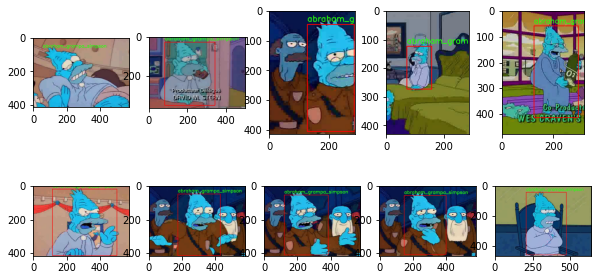

In [157]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(image[i])

## Data expansion for object detection dataset

In [158]:
import albumentations as A
import cv2

In [160]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

In [171]:
data =f_lst[1]
line = data.replace(" ",",").replace("\n","")
line = line.split(",")

In [172]:
annotation = {}

In [173]:
annotation["x_min"] =int(line[1])
annotation["y_min"]= int(line[2])
annotation["x_max"]= int(line[3])
annotation["y_max"]= int(line[4])
annotation["name"] = g_lst[int(line[5])].replace("\n","")

In [177]:

img = cv2.imread(line[0])

# image = cv2.imread(line)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

draw_bounding_box(image,annotation)

# Augment an image


transformed = transform(image=image)
transformed_image = transformed["image"]

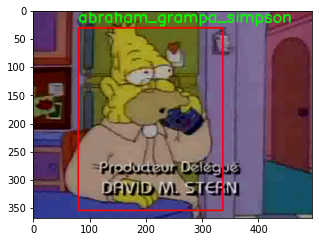

In [178]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(transformed_image)

plt.show()